In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

In [26]:
method_names = ['ipr', 'nrm', 'Bella_logreg', 'Bella_logreg_Vaz', 'Forman_logreg', 'Vaz',
                'Bella_RF', 'Bella_RF_Vaz', 'Forman_RF', 'Forman_RF_Vaz'] #'Forman_logreg_Vaz', ,'Forman_RF_Vaz'
df_list = []

In [27]:
for m in method_names:
    df_tmp = pd.read_csv('results/sim_par_1/'+m+'_pi_target07.csv')
    df_tmp['method'] = m
    df_list.append(df_tmp)

In [28]:
# df_list[4] = df_list[4].loc[:6,:]

In [29]:
df = pd.concat(df_list, ignore_index=True)

In [30]:
df['method'] = pd.Categorical(df['method'], categories=['ipr', 'nrm', 'Bella_logreg', 'Bella_logreg_Vaz', 'Forman_logreg',
                'Bella_RF', 'Bella_RF_Vaz', 'Forman_RF','Forman_RF_Vaz', 'Vaz'], ordered=True)

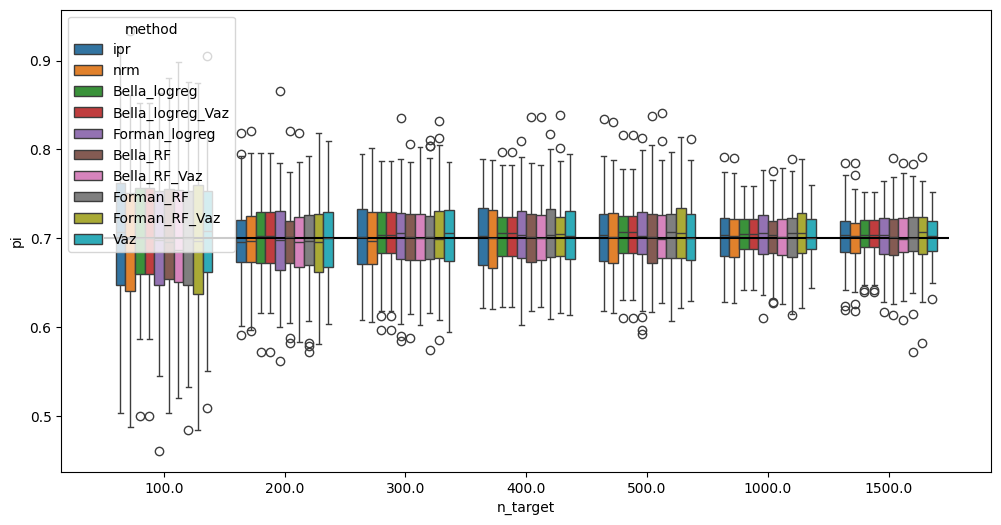

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(df, x='n_target', y='pi', hue='method')
plt.hlines(y=0.7, xmin=0-0.5, xmax=6.5, color='black')

In [32]:
df_var = df.groupby(['method', 'n_target']).agg(var_emp=('pi', lambda x: np.var(x, ddof=1))).reset_index()

/tmp/ipykernel_187970/1044334583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_var = df.groupby(['method', 'n_target']).agg(var_emp=('pi', lambda x: np.var(x, ddof=1))).reset_index()


In [33]:
np.var(df[(df['method'] == 'Bella_RF') & (df['n_target'] == 100)]['pi'], ddof=1)

np.float64(0.004740953802879958)

(array([0.52936905, 0.52936905, 1.85279167, 7.6758512 , 3.97026786,
        4.76432144, 3.70558334, 2.64684524, 0.52936905, 0.26468452]),
 array([0.52064106, 0.55842188, 0.59620271, 0.63398354, 0.67176436,
        0.70954519, 0.74732601, 0.78510684, 0.82288767, 0.86066849,
        0.89844932]),
 <BarContainer object of 10 artists>)

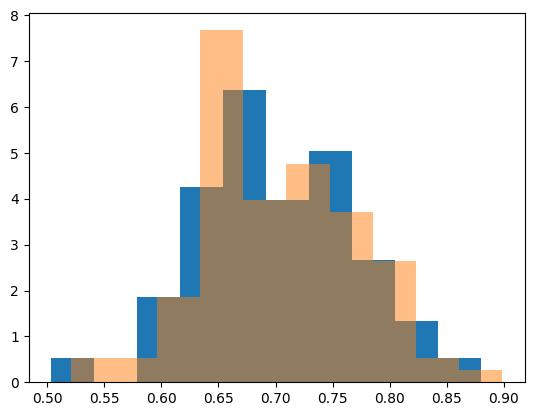

In [34]:
plt.hist(df[(df['method'] == 'Bella_RF') & (df['n_target'] == 100)]['pi'], density=True)
plt.hist(df[(df['method'] == 'Bella_RF_Vaz') & (df['n_target'] == 100)]['pi'], alpha=0.5, density=True)

In [35]:
np.var(df[(df['method'] == 'Bella_RF_Vaz') & (df['n_target'] == 100)]['pi'], ddof=1)

np.float64(0.004765858625223466)

In [36]:
np.sum((df['method'] == 'Bella_RF_Vaz') & (df['n_target'] == 100))

np.int64(100)

In [37]:
np.sum((df['method'] == 'Bella_RF') & (df['n_target'] == 100))

np.int64(100)

In [38]:
df_var[(df_var['method'] == 'Bella_RF') | (df_var['method']=='Bella_RF_Vaz')]

,method,n_target,var_emp
35,Bella_RF,100.0,0.004741
36,Bella_RF,200.0,0.001878
37,Bella_RF,300.0,0.001787
38,Bella_RF,400.0,0.001674
39,Bella_RF,500.0,0.001714
40,Bella_RF,1000.0,0.001064
41,Bella_RF,1500.0,0.001049
42,Bella_RF_Vaz,100.0,0.004766
43,Bella_RF_Vaz,200.0,0.001951
44,Bella_RF_Vaz,300.0,0.001795


In [39]:
df_merged = pd.merge(df, df_var, on=['n_target', 'method'], how='left')

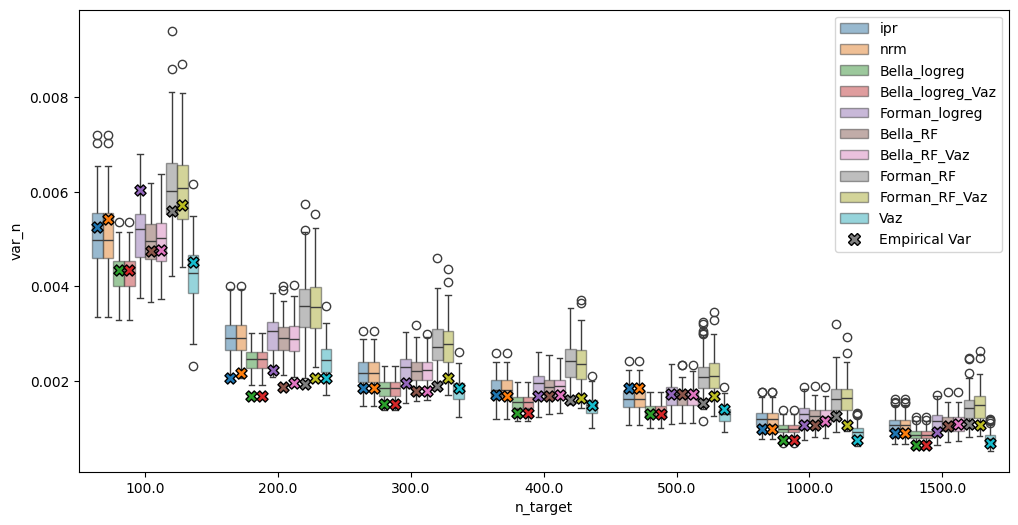

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(df_merged, x='n_target', y='var_n', hue='method', boxprops={'alpha':0.5})
sns.stripplot(data=df_merged[['n_target', 'method', 'var_emp']].drop_duplicates(), x='n_target', y='var_emp', hue='method',
              dodge=True, size=8, marker="X", edgecolor='black', linewidth=1)
# Fix duplicate legends
handles, labels = plt.gca().get_legend_handles_labels()
# Only keep one set of method handles
method_handles = handles[:len(df_merged['method'].unique())]
method_labels = labels[:len(df_merged['method'].unique())]

# Add a custom handle for empirical variance
empirical_handle = Line2D([0], [0], marker='X', color='w', label='Empirical variances',
                          markerfacecolor='gray', markersize=8, markeredgecolor='black')

# Combine legends
plt.legend(handles=method_handles + [empirical_handle],
           labels=method_labels + ['Empirical Var'])
plt.show()
